<a href="https://colab.research.google.com/github/gabriels3t/Python-Scikit-Learn-regressao-classificacao-e-clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação

In [28]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.svm import  SVR
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn import metrics

# Visualização

In [2]:
engajamento = pd.read_csv('data/Engajamento.csv')
engajamento.head()

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3


In [4]:
x = engajamento.iloc[:,:-1] #  iloc[:,:-1] Tudo menos, a ultima coluna
x

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900
...,...,...
4995,991.447007,5.428443
4996,996.841049,15.504041
4997,991.723479,4.750185
4998,996.695706,14.807956


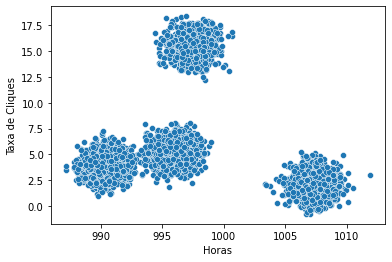

In [21]:
ax = sns.scatterplot(x='Horas',y='Taxa de Cliques',data= x)

# Kmeans

**Aplicação do Agrupamento**

In [10]:
kmeans = KMeans(n_clusters=2,random_state=0)# n_clusters = classes  random_state= assitema pseudo aleatorio

In [11]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [12]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

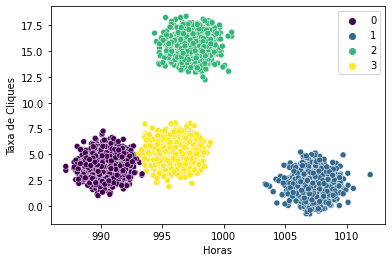

In [19]:
ax =sns.scatterplot(x='Horas',y='Taxa de Cliques',data=x,hue=kmeans.labels_,palette='viridis')

**Testando com 4 grupos**

In [14]:
kmeans= KMeans(n_clusters=4, random_state=0)


In [15]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

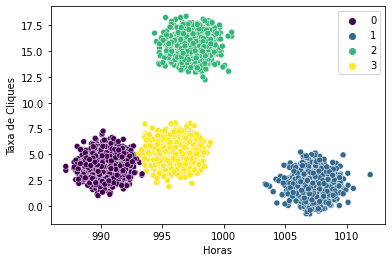

In [20]:
ax = sns.scatterplot(x='Horas',y='Taxa de Cliques',data=x,hue=kmeans.labels_,palette='viridis')

# Optics

**Testando com 8 elementos por grupo** 

In [18]:
 clustering_optics =   OPTICS(min_samples=8).fit(x)  # min_samples = minimo de elementos por grupo 

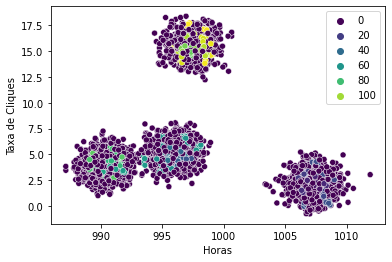

In [22]:
ax = sns.scatterplot(x='Horas',y='Taxa de Cliques',data=x,hue=clustering_optics.labels_,palette='viridis')

**Testando com 80**

In [23]:
 clustering_optics =   OPTICS(min_samples=80).fit(x) 

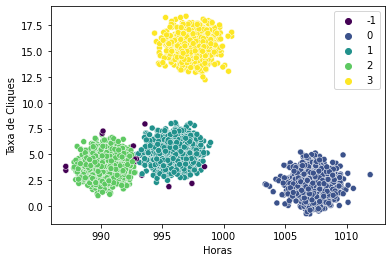

In [24]:
ax = sns.scatterplot(x='Horas',y='Taxa de Cliques',data=x,hue=clustering_optics.labels_,palette='viridis')

**Testando com 800**

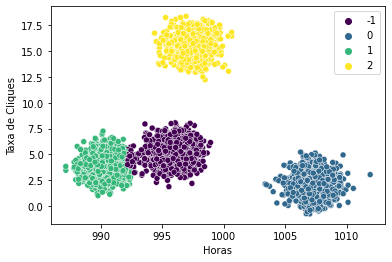

In [25]:
 clustering_optics =   OPTICS(min_samples=800).fit(x) 
ax = sns.scatterplot(x='Horas',y='Taxa de Cliques',data=x,hue=clustering_optics.labels_,palette='viridis')

# Avaliando o Agrupamento

In [26]:
classe_conhecida = engajamento['Classe']

In [49]:
classe_estimada = clustering_optics.labels_

In [52]:
taxa_de_acerto = metrics.adjusted_rand_score(classe_conhecida,classe_estimada)*100

print(f'A taxa de acerto foi de {taxa_de_acerto}%  ')

A taxa de acerto foi de 98.21047486293408%  


In [53]:
classe_estimada = kmeans.labels_

In [54]:
taxa_de_acerto = metrics.adjusted_rand_score(classe_conhecida,classe_estimada)*100
print(f'A taxa de acerto foi de {taxa_de_acerto}%  ')

A taxa de acerto foi de 99.57444328155857%  


###Usando o silhouette

***Geralmente usando quando não tem o conhecimento das classes***

In [43]:

metrics.silhouette_score(x,kmeans.labels_, metric='euclidean') 
# metric = metrica utilizada geralmente é a euclidiana

0.7640009351490763

In [44]:
metrics.silhouette_score(x,clustering_optics.labels_, metric='euclidean') 


0.7590075270703337